In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
baseline_seen = pd.read_pickle("/Users/andrew/school/spring21/11777/group-tars-alfred/tars/results/valid_seen/baseline_valid_seen_andrew_20210401_041308_917614.pkl")

moca_seen = pd.read_pickle("/Users/andrew/school/spring21/11777/group-tars-alfred/tars/results/valid_seen/moca_valid_seen_andrew_20210401_102412_600990.pkl")

baseline_unseen = pd.read_pickle("/Users/andrew/school/spring21/11777/group-tars-alfred/tars/results/valid_unseen/baseline_valid_unseen_andrew_20210401_014614_528924.pkl")

moca_unseen = pd.read_pickle("/Users/andrew/school/spring21/11777/group-tars-alfred/tars/results/valid_unseen/moca_valid_unseen_andrew_20210401_103447_576516.pkl")

dfs = {"baseline seen": baseline_seen, "baseline unseen": baseline_unseen, "MOCA seen": moca_seen, "MOCA unseen": moca_unseen}

for df in dfs.values():
    df['nav_obj'] = df['visible_interact_objs'] / df['interact_objs']
    df['int_succ'] = df['successful_interactions'] / df['attempted_interactions']
    df['bad_mask'] = df['bad_mask_interactions'] / (df['attempted_interactions'] - df['successful_interactions'])
    df['unnec_int'] = df['ui'] / df['interact_objs']
    df['success'] = df['success_spl'] > 0


In [40]:
task_type_labels = ["Examine\nin Light", "Pick &\nPlace", "Stack &\nPlace", "Clean &\nPlace", "Cool &\nPlace", "Heat &\nPlace", "Pick Two\n& Place"]

def plot_metric(metric, x_title, y_title):
    bs = baseline_seen.groupby('type')[metric].mean()
    bu = baseline_unseen.groupby('type')[metric].mean()
    ms = moca_seen.groupby('type')[metric].mean()
    mu = moca_unseen.groupby('type')[metric].mean()
    index = baseline_unseen['type'].unique()
    index.sort()
    plot_df = pd.DataFrame({'Seq2Seq Seen': bs, 'Seq2Seq Unseen': bu, 'MOCA Seen': ms, 'MOCA Unseen': mu}, index=index)
    ax = plot_df.plot.bar(figsize=(8, 4), xlabel=x_title, ylabel=y_title)
    ax.set_xticklabels(task_type_labels, rotation="horizontal")

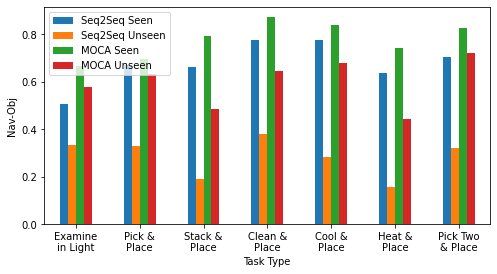

In [49]:
plot_metric('nav_obj', "Task Type", "Nav-Obj")

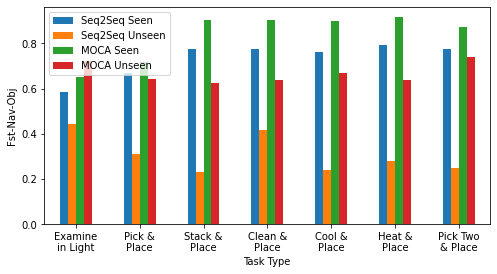

In [51]:
plot_metric('first_interact_obj_success', "Task Type", "Fst-Nav-Obj")

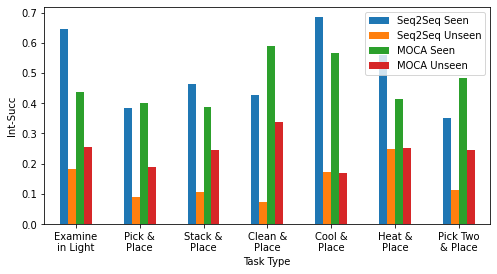

In [52]:
plot_metric('int_succ', "Task Type", "Int-Succ")

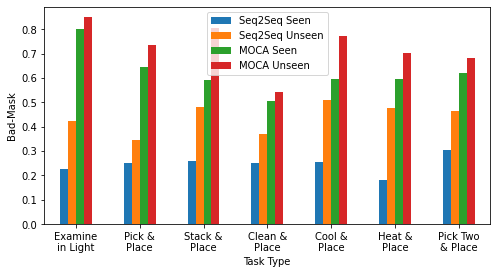

In [53]:
plot_metric('bad_mask', "Task Type", "Bad-Mask")

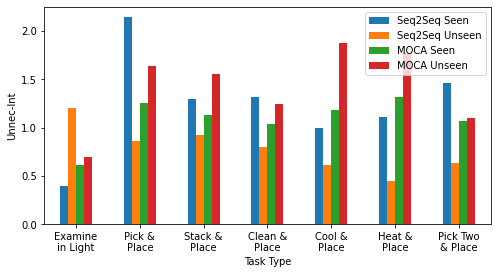

In [54]:
plot_metric('unnec_int', "Task Type", "Unnec-Int")

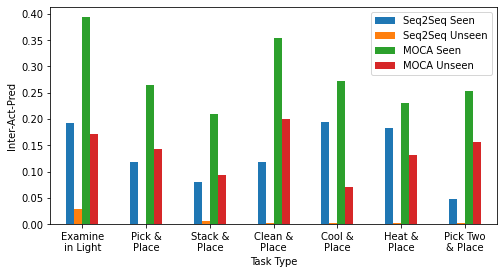

In [55]:
plot_metric('iapp', "Task Type", "Inter-Act-Pred")

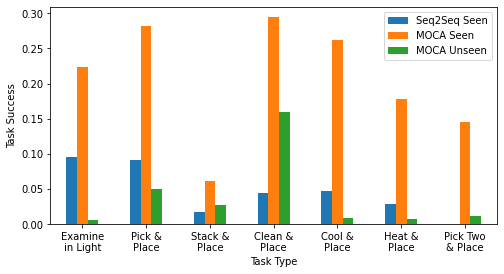

In [56]:
plot_metric('success', "Task Type", "Task Success")

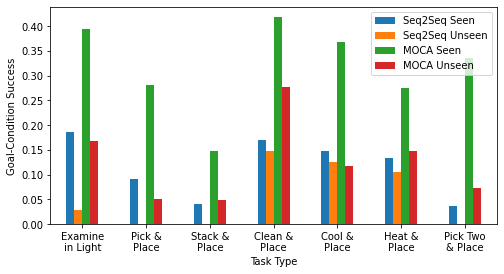

In [57]:
plot_metric('goal_condition_success', "Task Type", "Goal-Condition Success")

In [63]:
df = moca_unseen
df.groupby('type')['success'].sum()

type
look_at_obj_in_light                  1
pick_and_place_simple                 5
pick_and_place_with_movable_recep     3
pick_clean_then_place_in_recep       18
pick_cool_then_place_in_recep         1
pick_heat_then_place_in_recep         1
pick_two_obj_and_place                1
Name: success, dtype: int64